In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical

# 指定亂數種子
np.random.seed(7)

In [2]:
# 載入資料集
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
# 將圖片轉換成 4D 張量
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32")
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype("float32")

In [4]:
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_train = X_train / 255
X_test = X_test / 255

In [5]:
# One-hot編碼
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [6]:
# 定義模型
model = Sequential()
model.add(Conv2D(16, kernel_size=(5, 5), padding="same",
                 input_shape=(28, 28, 1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(5, 5), padding="same",
                 activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

In [7]:
model.summary()   # 顯示模型摘要資訊

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 32)          0         
                                                                 
 flatten (Flatten)           (None, 1568)              0

In [8]:
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])

In [9]:
# 訓練模型
history = model.fit(X_train, Y_train, validation_split=0.2,
                    epochs=10, batch_size=128, verbose=2)

Epoch 1/10
375/375 - 8s - loss: 0.4006 - accuracy: 0.8765 - val_loss: 0.0809 - val_accuracy: 0.9757 - 8s/epoch - 21ms/step
Epoch 2/10
375/375 - 2s - loss: 0.1353 - accuracy: 0.9593 - val_loss: 0.0622 - val_accuracy: 0.9805 - 2s/epoch - 6ms/step
Epoch 3/10
375/375 - 2s - loss: 0.1030 - accuracy: 0.9688 - val_loss: 0.0508 - val_accuracy: 0.9846 - 2s/epoch - 4ms/step
Epoch 4/10
375/375 - 2s - loss: 0.0856 - accuracy: 0.9736 - val_loss: 0.0441 - val_accuracy: 0.9868 - 2s/epoch - 4ms/step
Epoch 5/10
375/375 - 2s - loss: 0.0742 - accuracy: 0.9771 - val_loss: 0.0383 - val_accuracy: 0.9890 - 2s/epoch - 4ms/step
Epoch 6/10
375/375 - 2s - loss: 0.0676 - accuracy: 0.9789 - val_loss: 0.0368 - val_accuracy: 0.9893 - 2s/epoch - 4ms/step
Epoch 7/10
375/375 - 1s - loss: 0.0637 - accuracy: 0.9807 - val_loss: 0.0402 - val_accuracy: 0.9883 - 1s/epoch - 4ms/step
Epoch 8/10
375/375 - 1s - loss: 0.0574 - accuracy: 0.9828 - val_loss: 0.0350 - val_accuracy: 0.9906 - 1s/epoch - 4ms/step
Epoch 9/10
375/375 - 2s

In [10]:
# 評估模型
loss, accuracy = model.evaluate(X_train, Y_train, verbose=0)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))

訓練資料集的準確度 = 0.99
測試資料集的準確度 = 0.99


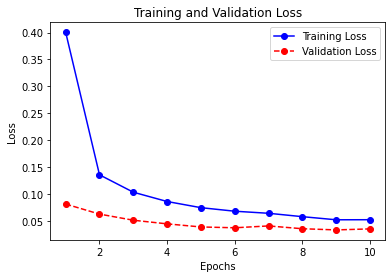

In [11]:
# 顯示圖表來分析模型的訓練過程
import matplotlib.pyplot as plt
# 顯示訓練和驗證損失
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

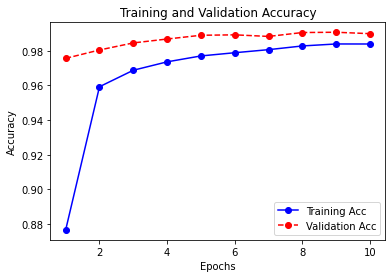

In [12]:
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

(-0.5, 27.5, 27.5, -0.5)

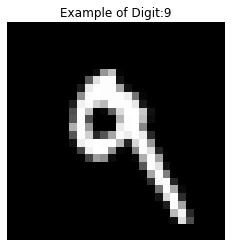

In [13]:
# 載入資料集
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# 選一個測試的數字圖片 
i = 7
digit = X_test[i].reshape(28, 28)
# 將圖片轉換成 4D 張量
X_test_digit = X_test[i].reshape(1, 28, 28, 1).astype("float32")
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_test_digit = X_test_digit / 255
# 繪出數字圖片
plt.figure()
plt.title("Example of Digit:" + str(Y_test[i]))
plt.imshow(digit, cmap="gray")
plt.axis("off")

[1.0492092e-11 4.4262802e-09 9.5299511e-09 1.0865822e-06 2.4895384e-05
 2.8943402e-08 4.9003631e-12 5.8478321e-08 5.5156022e-07 9.9997330e-01]


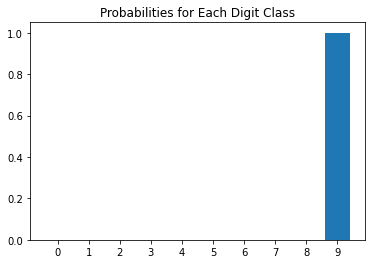

In [14]:
# 預測結果的機率
probs = model.predict(X_test_digit, batch_size=1)[0]
print(probs)
plt.title("Probabilities for Each Digit Class")
plt.bar(np.arange(10), probs.reshape(10), align="center")
plt.xticks(np.arange(10),np.arange(10).astype(str))
plt.show()